Bioinformatyka2 2025/2026, Adrian Kania, Ćwiczenia3

<h2> Biologiczne bazy danych

<h3> Protein Data Bank (PDB)

PDB to otwarta baza danych trójwymiarowych struktur makromolekuł biologicznych, takich jak białka, DNA i RNA, uzyskanych metodami eksperymentalnymi, m.in. krystalografią rentgenowską czy spektroskopią NMR.

In [4]:
from urllib.request import urlopen #moduł żeby otworzyc URL

def downloadPDBasList(pdbId):
    response = urlopen(f'http://www.rcsb.org/pdb/files/{pdbId}.pdb') #otwieramy połączenie
    data = response.read().decode('utf-8') #sposob kodowania
    t = data.split('\n') #kazda linijka bedzie osobnym elementem listy
    return t

In [3]:
t = downloadPDBasList("1UBQ") #pobieramy białko o zadanym ID

#Wyświetlamy pierwsze 10 linijek
n = 0
for line in t:
    print(line)
    n += 1

HEADER    CHROMOSOMAL PROTEIN                     02-JAN-87   1UBQ              
TITLE     STRUCTURE OF UBIQUITIN REFINED AT 1.8 ANGSTROMS RESOLUTION            
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: UBIQUITIN;                                                 
COMPND   3 CHAIN: A;                                                            
COMPND   4 ENGINEERED: YES                                                      
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: HOMO SAPIENS;                                   
SOURCE   3 ORGANISM_COMMON: HUMAN;                                              
SOURCE   4 ORGANISM_TAXID: 9606                                                 
KEYWDS    CHROMOSOMAL PROTEIN                                                   
EXPDTA    X-RAY DIFFRACTION                                                     
AUTHOR    S.VIJAY-KUMAR,C.E.

<h4> Zadanie1. Zdefiniuj funkcję, która dla wybranego łańcucha zadanego białka wyznacza geometryczną odległość pomiędzy pierwszym i ostatnim atomem. Przykładowo, dla $1UBQ$, dla łańcucha $A$ będzie to odległość między punktem $P_1(27.34, 24.43, 2.614)$ a $P_2(40.862,39.575,36.251)$ i wynosi ona $39.30$ $A$.

$d = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2+(z_1-z_2)^2}$

https://www.uniprot.org/

https://scop.berkeley.edu/

https://alphafoldserver.com/welcome

<h3> PubMed

PubMed to baza danych publikacji naukowych z zakresu medycyny, biologii, bioinformatyki i nauk pokrewnych, prowadzona przez NCBI (National Center for Biotechnology Information).

<h4> *Wyszukiwanie prac zadanego autora

In [4]:
from urllib.request import urlopen
from urllib.parse import urlencode 
from lxml import etree  #modul zeby otworzyc pliki XML


##########NASZE ZAPYTANIE
author_name = "Krzysztof Murzyn"
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
url = base_url+ urlencode({"db": "pubmed", "term": author_name+"[author]", "retmax": 30})  #db = database
#########################

#########OTWORZ URL I PRZECZYTAJ XML
response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)
####################################

In [5]:
tags = list({elem.tag for elem in xml.iter()}) #Co mozemy sie dowiedziec?

print(tags)

['From', 'To', 'TranslationSet', 'Count', 'RetMax', 'Translation', 'Id', 'IdList', 'QueryTranslation', 'eSearchResult', 'RetStart']


In [6]:
resultelements = xml.xpath("//Id") #wszystkie ID prac autora

for elem in resultelements:
    print(elem.text)

39789967
39246722
39141478
38750995
37592849
37416056
37350851
36464767
35723299
32940993
30504221
27902406
26825705
26718149
25867074
25296168
24660117
24286298
23527010
22428146
22284390
20506323
19909337
19199693
17985365
20408622
16395663
15652158
15556990
14594994


<h4> *Wyszukiwanie pracy po ID

In [7]:
from urllib.request import urlopen
from lxml import etree

##########NASZE ZAPYTANIE
PMID = '33713823' #nr pracy
baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = "db=pubmed&id="+PMID+"&format=xml"    
########################

#########OTWORZ URL I PRZECZYTAJ XML
url = baseurl+query
f = urlopen(url) 
resultxml = f.read() 
xml = etree.XML(resultxml) 
###################################

tags = list({elem.tag for elem in xml.iter()}) #co sie moge dowiedzieć o tej pracy?
print(tags)

['Title', 'MedlinePgn', 'DateCompleted', 'StartPage', 'PubMedPubDate', 'Affiliation', 'Minute', 'PubmedArticleSet', 'ArticleIdList', 'PubDate', 'ISSN', 'EndPage', 'AuthorList', 'DescriptorName', 'PublicationType', 'ForeName', 'CitationSubset', 'PublicationStatus', 'Country', 'Keyword', 'Day', 'Author', 'ArticleTitle', 'NlmUniqueID', 'PubmedData', 'MedlineCitation', 'Abstract', 'AbstractText', 'PMID', 'Pagination', 'MeshHeadingList', 'MedlineJournalInfo', 'PubmedArticle', 'Year', 'DateRevised', 'PublicationTypeList', 'ISOAbbreviation', 'Initials', 'JournalIssue', 'MedlineTA', 'KeywordList', 'ISSNLinking', 'Journal', 'Month', 'AffiliationInfo', 'MeshHeading', 'LastName', 'CopyrightInformation', 'Language', 'Issue', 'ELocationID', 'Hour', 'Volume', 'History', 'ArticleId', 'ArticleDate', 'Article']


In [8]:
#Zobacz tytul

resultelements= xml.xpath("//ArticleTitle") 

for element in resultelements:
    print(element.text)

The robustness of the chaos game representation to mutations and its application in free-alignment methods.


In [9]:
#Zobacz abstrakt

resultelements= xml.xpath("//AbstractText") 

for element in resultelements:
    print(element.text)

Numerical representation of biological sequences plays an important role in bioinformatics and has many practical applications. One of the most popular approaches is the chaos game representation. In this paper, the authors propose a novel look into chaos game construction - an analytical description of this procedure. This type enables to build more general number sequences using different weight functions. The authors suggest three conditions that these functions should hold. Additionally, they present some criteria to compare them and check whether they provide a unique representation. One of the most important advantages of our approach is the possibility to construct such a description that is less sensitive to mutations and as a result, give more reliable values for free-alignment phylogenetic trees constructions. Finally, the authors applied the DFT method using four types of functions and compared the obtained results using the BLAST tool.


Uwaga: 
- przy pobieraniu większej liczbie rekordów warto zastosować time.sleep(1) z modułu time
- przy zapisywaniu do pliku warto zadać sposób kodowania ze względu na różnorodność znaków (encoding="utf-8")

<h4> Zadanie2: 
    
    Z bazy danych PubMed pobierz i zapisz do pliku tekstowego wszystkie tytuły publikacji (każdy w nowej linijce) których autorem (lub współautorem) jest Krzysztof Murzyn.
        
    Zadanie możesz wykonać w krokach:
    - pobierz IDs wszystkich prac,
    - pobierz wszystkie tytuły dla każdego ID (możesz zapisać je do listy)
    - zapisz dane do pliku tekstowego

<h4> Zadanie3: 
    
    Ile razy słowo "molecule" wystąpiło we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna?

<h4> Zadanie4: 
    
    - Otwórz plik prace.txt zawierający ID wybranych prac z PubMed. Pobierz MeshTerms'y (TAG: DescriptorName) dla każdej pracy.

    - Efektem powinna być lista list meshtermsów. Zamień wszystkie litery na małe.
    
    - Przekształć utworzoną listę na postać wektorową (technika TF-IDF).
    
    - Dokonaj standaryzacji danych, a następnie zastosuj metodę PCA do redukcji wymiaru i zaprezentuj wyniki w postaci 2D. Skomentuj otrzymane rezultaty. Ile grup tematycznych dostrzegasz?

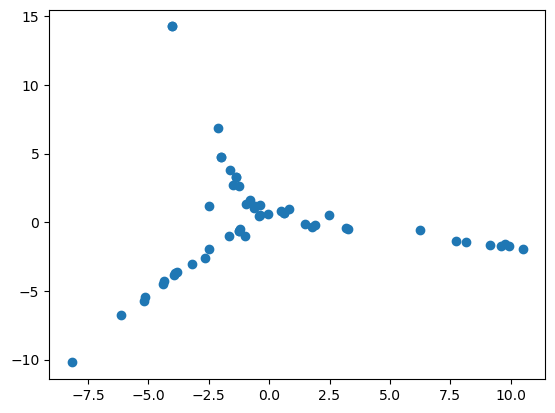

In [4]:
#oczekiwany rezultat

<h3> Nucleotide

Baza Nucleotide w NCBI to publiczne repozytorium sekwencji kwasów nukleinowych, obejmujące DNA i RNA pochodzące z różnych organizmów, w tym genomów, genów, transkryptów i sekwencji mitochondrialnych.

In [10]:
from urllib.request import urlopen
from lxml import etree

##########NASZE ZAPYTANIE
ID = 'U20285.2' # id sekwencji
baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
query = "db=nucleotide&id="+ID+"&format=xml" 
url = baseurl+query
########################

#########OTWORZ URL I PRZECZYTAJ XML
f = urlopen(url) 
resultxml = f.read() 
xml = etree.XML(resultxml) 
###################################

In [11]:
tags = list({elem.tag for elem in xml.iter()}) #co sie mogę dowiedziec o tej sekwencji?

print(tags)

['GBInterval_accession', 'GBSeq', 'GBSeq_feature-table', 'GBFeature_intervals', 'GBReference_reference', 'GBQualifier_name', 'GBInterval_to', 'GBSeq_strandedness', 'GBSeq_topology', 'GBReference_journal', 'GBReference_title', 'GBFeature', 'GBSeq_other-seqids', 'GBSeq_organism', 'GBSet', 'GBSeq_comment', 'GBSeq_moltype', 'GBSeq_update-date', 'GBSeqid', 'GBSeq_definition', 'GBSeq_sequence', 'GBSeq_source', 'GBFeature_quals', 'GBInterval_from', 'GBReference', 'GBFeature_key', 'GBSeq_create-date', 'GBSeq_length', 'GBSeq_accession-version', 'GBSeq_taxonomy', 'GBReference_authors', 'GBSeq_locus', 'GBAuthor', 'GBReference_remark', 'GBInterval', 'GBSeq_primary-accession', 'GBQualifier_value', 'GBSeq_references', 'GBReference_position', 'GBQualifier', 'GBSeq_division', 'GBReference_pubmed', 'GBFeature_location', 'GBInterval_point']


In [12]:
resultelements = xml.xpath("//GBSeq_sequence") #sekwencja

for element in resultelements:
    print(element.text)

tctctgaagttccagaatcgatggaagtggacggcacgccgcggcggggtgggtgcaagatgccgctgccggttcaggtgtttaacttgcagggggccgtggagcccatgcagatcgacgtggacccccaggaagacccgcagaatgcacctgacgtcaactacgtggtggagaaccccagcctggatctggaacagtacgcggccagctacagcggcctgatgcgcatcgaacggctgcagttcattgctgatcactgccccacgctgcgggtggaggccctgaagatggccctctccttcgtgcagagaacctttaacgtggacatgtacgaggagatccaccgcaagctctcagaggccaccagggagctgcagaacgcacccgacgccatccctgagagcggcgtggagcccccagccctggacacggcctgggtggaggccacgcggaagaaggcgctgctgaagctggagaagctggacacagacctgaagaactacaagggcaactccatcaaagagagcatccggcgcggccacgacgacctgggcgaccactacctggactgtggggacctcagcaacgccctcaagtgctattcccgggcccgggactactgcaccagcgccaaacacgtcatcaacatgtgcctcaatgtcatcaaggtcagcgtctacttgcagaattggtctcatgtgctcagctacgtcagcaaggctgagtccaccccagagattgccgagcagcgaggagagcgtgacagccagacccaggccatcctcaccaagctcaagtgtgccgcaggcttggcagagctggccgccaggaagtacaagcaggctgccaagtgcctcctgctggcttcctttgatcactgtgacttccctgagctgctgtcccccagcaacgtggccatctacggtggcctgtgcgccttggctacctttgaccggcaggagctgcagcgcaatgtcatctccagcagctccttcaagtt

<h4> Zadanie5: 
    
    Zdefiniuj funkcję, która pobiera pewną liczbę rekordów z Nucleotide, a która to zapisuje je w zewnętrznym pliku FASTA, gdzie nazwa znajduje się w [GBSeq_definition] a sekwencja w [GBSeq_sequence]. Przetestuj działanie funkcji na: NM_001012006.1, MK560199.1, AB046569.1. 
    
    

<h3>PubChem

PubChem to baza danych NCBI zawierająca głównie małe związki chemiczne wraz z ich strukturami, właściwościami fizykochemicznymi i danymi biologicznymi. Służy jako otwarte źródło informacji wykorzystywane w chemoinformatyce, projektowaniu leków i analizach bioinformatycznych.

<h4> *Wizualizacja struktury związków chemicznych w oparciu o format SMILES

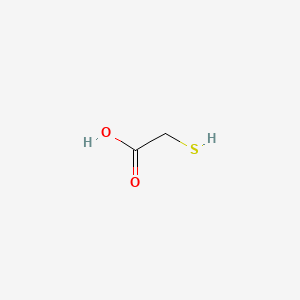

In [13]:
from urllib.request import urlretrieve
from IPython.display import Image  #do wyswietlania obrazka

smiles = 'C(=O)(O)CS'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

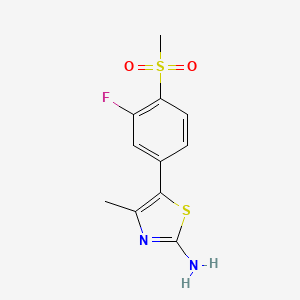

In [14]:
from urllib.request import urlretrieve
from IPython.display import Image  #do wyswietlania obrazka

smiles = 'NC1=NC(C)=C(C2=CC=C(S(=O)(C)=O)C(F)=C2)S1'
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+smiles+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> *Nazwa na podstawie SMILES

In [15]:
import requests

def smiles_to_pubchem(smiles):
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{smiles}/cids/JSON"
    response = requests.get(url).json()

    if "IdentifierList" not in response:
        print("Nie znaleziono związku dla podanego SMILES.")
        return None

    cid = response["IdentifierList"]["CID"][0]
    name_url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/IUPACName/JSON"
    name_response = requests.get(name_url).json()
    name = name_response["PropertyTable"]["Properties"][0].get("IUPACName", "brak nazwy")
    return name


#przykład działania
print(smiles_to_pubchem("C1=NC2=NC=NC(=C2N1)N"))

7H-purin-6-amine


* Synonimy

In [16]:
sm = "7H-purin-6-amine"
query = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{sm}/synonyms/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)
synonyms = []
for elem in tree.iter():
    if elem.tag == "{http://pubchem.ncbi.nlm.nih.gov/pug_rest}Synonym":
        synonyms.append(elem.text)
        
print(synonyms[:10]) #pierwsze 10 synonimow

['adenine', '73-24-5', '6-Aminopurine', '1H-Purin-6-amine', '7H-Purin-6-amine', 'Adenin', 'Adeninimine', 'Leuco-4', '6-Amino-1H-purine', '6-Amino-3H-purine']


<h4> *Pobieranie struktury związków chemicznych oraz jego właściwości fizykochemicznych w oparciu o nazwę związku

In [17]:
import requests

n = "adenine"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{n}/property/CanonicalSMILES,MolecularWeight,XLogP,TPSA,HBondDonorCount,HBondAcceptorCount,RotatableBondCount/JSON"

response = requests.get(url).json()
props = response["PropertyTable"]["Properties"][0]

print("SMILES:", props["ConnectivitySMILES"])
print("Masa molowa:", float(props["MolecularWeight"])) #masa zwracana jest jako napis, stąd str -> float
print("logP (lipofilowość):", props["XLogP"])
print("Liczba donorów H:", props["HBondDonorCount"])
print("Liczba akceptorów H:", props["HBondAcceptorCount"])
print("Liczba wiązań rotowalnych:", props["RotatableBondCount"])
print("Powierzchnia TPSA:", props["TPSA"])

SMILES: C1=NC2=NC=NC(=C2N1)N
Masa molowa: 135.13
logP (lipofilowość): -0.1
Liczba donorów H: 2
Liczba akceptorów H: 4
Liczba wiązań rotowalnych: 0
Powierzchnia TPSA: 80.5


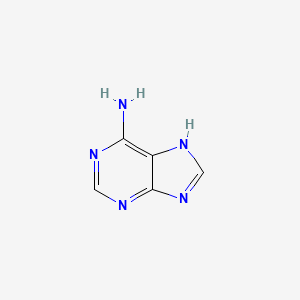

In [18]:
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/'+props["ConnectivitySMILES"]+'/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
p

<h4> Zadanie6:
    
    - Pobierz w formacie SMILES informację o strukturze Lopinavir'u (inhibiora proteazy HIV), zwizualizuj tę cząsteczkę. 
    - *(nieobowiązkowe)* Na podstawie rekordu 1MUI z PDB, wyznacz od której reszty aminokwasowej z proteazy HIV związek lopinavir ma najmniejszą odległość.
    - Zdefiniuj funkcję, która dla danego związku (na podstawie nazwy) zwraca listę właściwości fizykochemicznych - masę, logP, liczbę donorów H, liczbę akceptorów H, liczbę wiązań rotowalnych, powierzchnię TPSA.
    - Wywołaj funkcję dla różnych inhibitorów proteazy HIV jak i innych leków (niezwiązanych bezpośrednio z proteazą HIV), wynik zapisz jako lista list.
    - Dokonaj standaryzacji danych, a następnie PCA z k=2. Zwizualizuj wynniki, kolorując obserwacje wg grup. Skomentuj otrzymany wykres.

In [68]:
hiv_protease_inhibitors = [
    "Lopinavir",
    "Ritonavir",
    "Saquinavir",
    "Indinavir",
    "Nelfinavir",
    "Atazanavir",
    "Darunavir",
    "Fosamprenavir",
    "Tipranavir",
    "Amprenavir"
]

non_inhibitors = [
    "Simvastatin",
    "Loratadine",
    "Omeprazole",
    "Maraviroc",
    "Diazepam",
    "Captopril",
    "Naproxen",
    "Losartan",
    "Fexofenadine",
    "Celecoxib"
]

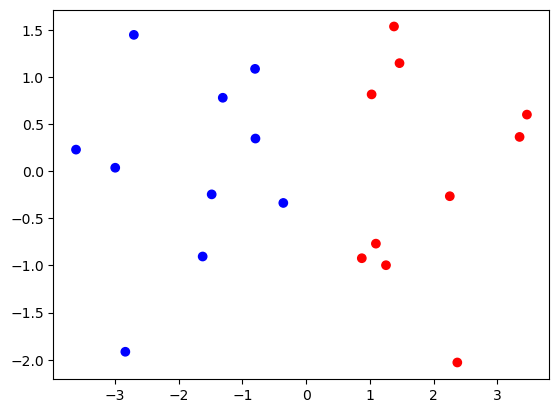

In [73]:
#oczekiwany rezultat

https://www.ebi.ac.uk/chembl/

<h3> Uzupełnienie

<h4> *TF-IDF

In [19]:
documents = ["new york times", "new york post", "los angeles times"]
N = len(documents)
print(N)

3


In [20]:
import binf2 as b
import pandas as pd

df = b.TFIDF(documents, True)
print(df)

       post     times      york   angeles       los       new
0  0.000000  0.584963  0.584963  0.000000  0.000000  0.584963
1  1.584963  0.000000  0.584963  0.000000  0.000000  0.584963
2  0.000000  0.584963  0.000000  1.584963  1.584963  0.000000


-> Nowy dokument (tekst)

In [21]:
new_doc = {'los': 0.0,
 'york': 0.0,
 'post': 0.0,
 'angeles': 0.0,
 'new': 0.5849625007211562,
 'times': 0.2924812503605781}

In [22]:
df2 = pd.concat([df, pd.DataFrame([new_doc])], ignore_index=True)
print(df2)

       post     times      york   angeles       los       new
0  0.000000  0.584963  0.584963  0.000000  0.000000  0.584963
1  1.584963  0.000000  0.584963  0.000000  0.000000  0.584963
2  0.000000  0.584963  0.000000  1.584963  1.584963  0.000000
3  0.000000  0.292481  0.000000  0.000000  0.000000  0.584963


<h4> *Standaryzacja + PCA

In [23]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #standaryzacja danych
Xs = sc.fit_transform(df2)

#PCA jest algorytmem do redukcji ilosci zmiennych  (w tym przypadku chodzi o zmniejszeniu 6 kolumn do dwoch)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xs)
X_pca = pca.transform(Xs)

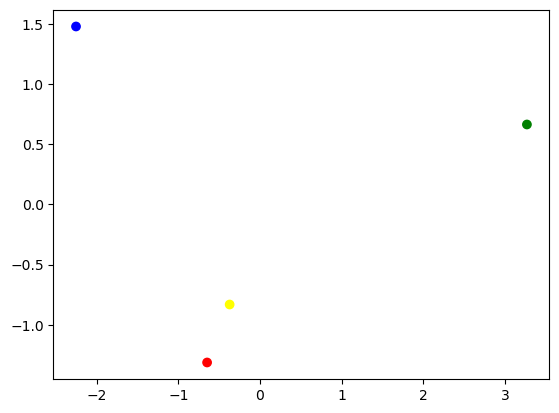

In [24]:
import matplotlib.pyplot as plt #biblioteka do rysowania wwykresow
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=1, c = ["red", "blue", "green", "yellow"])
plt.show()

<h4> *RDKit

RDKit to otwarta biblioteka chemoinformatyczna dla Pythona, która pozwala na analizę i manipulację struktur chemicznych, obliczanie właściwości fizykochemicznych, generowanie deskryptorów oraz pracę z SMILES, Mol i innymi formatami molekuł. RDKit liczy właściwości na podstawie struktury chemicznej, czyli SMILES, Mol czy inne reprezentacje cząsteczki.

In [60]:
from rdkit import Chem
from rdkit.Chem import Descriptors

smiles ="C1=NC2=NC=NC(=C2N1)N"
mol = Chem.MolFromSmiles(smiles)

#obliczanie właściwości
masa_mol = Descriptors.MolWt(mol)
logp = Descriptors.MolLogP(mol)
h_donory = Descriptors.NumHDonors(mol)
h_akceptory = Descriptors.NumHAcceptors(mol)
rot_bonds = Descriptors.NumRotatableBonds(mol)
tpsa = Descriptors.TPSA(mol)

print(f"Masa molowa: {masa_mol}")
print(f"logP (lipofilowość): {logp}")
print(f"Liczba donorów H: {h_donory}")
print(f"Liczba akceptorów H: {h_akceptory}")
print(f"Liczba wiązań rotowalnych: {rot_bonds}")
print(f"Powierzchnia TPSA: {tpsa}")

Masa molowa: 135.12999999999997
logP (lipofilowość): -0.06490000000000001
Liczba donorów H: 2
Liczba akceptorów H: 4
Liczba wiązań rotowalnych: 0
Powierzchnia TPSA: 80.48


<h4> *Biopython

In [7]:
from Bio import Entrez
Entrez.email = "twoj.email@example.com"
handle = Entrez.efetch(db="nucleotide", id="278554061", rettype="fasta", retmode="text")
record = handle.read()
print(record)
handle.close()

>DAAB012401936.1 TPA_asm: Homo sapiens contig2401936, whole genome shotgun sequence
ACGTCGTCTAATTCTGATACTCTGTAGCCATTAAACAGTAGCTCCCTATTTCCTCCTCTCCCCAGCCCTG
ACAGTCATCATTCTACTTTCTGTTCCTGTGATTTGGCTATTTTAGGTATCCCATATAAGTGGAGTCATAC
AATATT


